# Arithmetics

Some properties of a dynamic reservoir may not be explicitly defined, but can be derived from other properties. This can be achieved by using specific keywords in the Eclipse E100 and E300 syntax. These keywords can also modify property values within a specific region defined by a `box`.

`Deepfield` supports the following list of arithmetics keywords:

- `EQUALS`: set a grid property to a constant value;
- `ADD`: add a constant to a grid property;
- `MULTIPLY`: nultiply a grid property by a constant;
- `COPY`: copy data from one property array to another.


Required imports:

In [1]:
import sys
sys.path.append('..')
from deepfield import Field
import matplotlib.pyplot as plt

Consider the simple model given in `/tests/data/arithmetics_test_model/`, in which grid properties are defined using the arithmetics keywords. Let's take a look at a fragment of this model:

In [2]:
with open('../deepfield/tests/data/arithmetics_test_model/test_model.data') as f:
    t = f.readlines()
    print(''.join(t[42:63]))

PORO
    100*0.2 /

COPY
   PORO PERMX /
/
MULTIPLY
    PERMX 500 1 10 1 10 1 1  /
/
COPY
    PERMX PERMY /
    PERMX PERMZ /
/
MULTIPLY
    PERMZ 0.1 1 10 1 10 1 1  /
/

ADD
    PERMY   5   4 6 4 6 1 1 /
/




Note that `PERMX`, `PERMY`, `PERMZ` are not defined explicitly but are set using arithmetics operations. Let's load the model to see how they will be processed:

In [3]:
model = Field('../deepfield/tests/data/arithmetics_test_model/test_model.data').load()

INFO:Field:Using default config.
INFO:Field:Start reading test_model.data
INFO:Field:[test_model.data:3] Loading TITLE
INFO:Field:[test_model.data:9] Loading START
INFO:Field:[test_model.data:13] Loading METRIC
INFO:Field:[test_model.data:14] Loading OIL
INFO:Field:[test_model.data:15] Loading WATER
INFO:Field:[test_model.data:17] Loading DIMENS
INFO:Field:[test_model.data:30] Loading DX
INFO:Field:[test_model.data:33] Loading DY
INFO:Field:[test_model.data:37] Loading DZ
INFO:Field:[test_model.data:40] Loading TOPS
INFO:Field:[test_model.data:43] Loading PORO
INFO:Field:[test_model.data:46] Loading COPY
INFO:Field:Copy rock:PORO to rock:PERMX
INFO:Field:[test_model.data:49] Loading MULTIPLY
INFO:Field:Multiply rock:PERMX by 500.0 in box [0, 10, 0, 10, 0, 1]
INFO:Field:[test_model.data:52] Loading COPY
INFO:Field:Copy rock:PERMX to rock:PERMY
INFO:Field:Copy rock:PERMX to rock:PERMZ
INFO:Field:[test_model.data:56] Loading MULTIPLY
INFO:Field:Multiply rock:PERMZ by 0.1 in box [0, 10, 0,

Check loaded attributes:

In [4]:
print(f'PERMX shape: {model.rock.permx.shape}')
print(f'PERMY shape: {model.rock.permx.shape}')
print(f'PERMZ shape: {model.rock.permx.shape}')

PERMX shape: (10, 10, 1)
PERMY shape: (10, 10, 1)
PERMZ shape: (10, 10, 1)


Consider the `PERMY`. By definition, it is a copy of `PERMX` modified by the `ADD` operation:

In [5]:
print(''.join(t[59:62]))

ADD
    PERMY   5   4 6 4 6 1 1 /
/



Let's compare `PERMX` and `PERMY`:

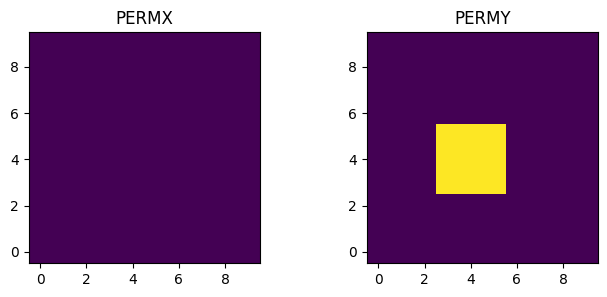

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].imshow(model.rock.permx, origin='lower')
ax[0].set_title('PERMX')
ax[1].imshow(model.rock.permy, origin='lower')
ax[1].set_title('PERMY')
plt.show()

We see that `PERMY` is modified in the region defined by the box [4:6, 4:6, 1:1] (note that the enumeration in ECLIPSE starts with 1 rather than 0 as in python). 

Done!